<a href="https://colab.research.google.com/github/Rushabh1306/Automobile-Price-Prediction/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Case Study : Automobile Price Prediction**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Read the data
data = pd.read_csv("/content/Automobile_data.csv")
data = data.replace("?", np.NaN)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Data Preprocessing Stage**

In [ ]:
#Null Values
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

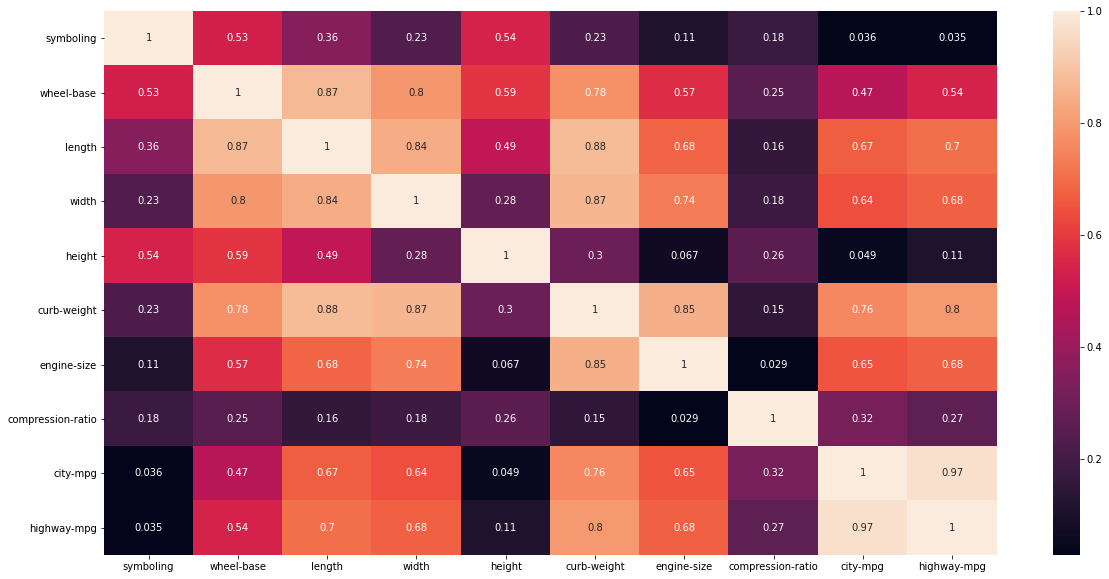

In [ ]:
data.info()
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [ ]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# data conversion

data["normalized-losses"] = data["normalized-losses"].astype(np.float64)
data["bore"] = data["bore"].astype(np.float64)
data["stroke"] = data["stroke"].astype(np.float64)
data["horsepower"] = data["horsepower"].astype(np.float64)
data["peak-rpm"] = data["peak-rpm"].astype(np.float64)
data["price"] = data["price"].astype(np.float64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Data Insertion

data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
data['compression-ratio'] = data['compression-ratio'].fillna(data['compression-ratio'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
data['city-mpg'] = data['city-mpg'].fillna(data['city-mpg'].mean())
data['highway-mpg'] = data['highway-mpg'].fillna(data['highway-mpg'].mode())
data["num-of-doors"] = data["num-of-doors"].fillna(data["num-of-doors"].mode()[0])

In [ ]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
# Remove price rows
data = data.dropna(axis=0)

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

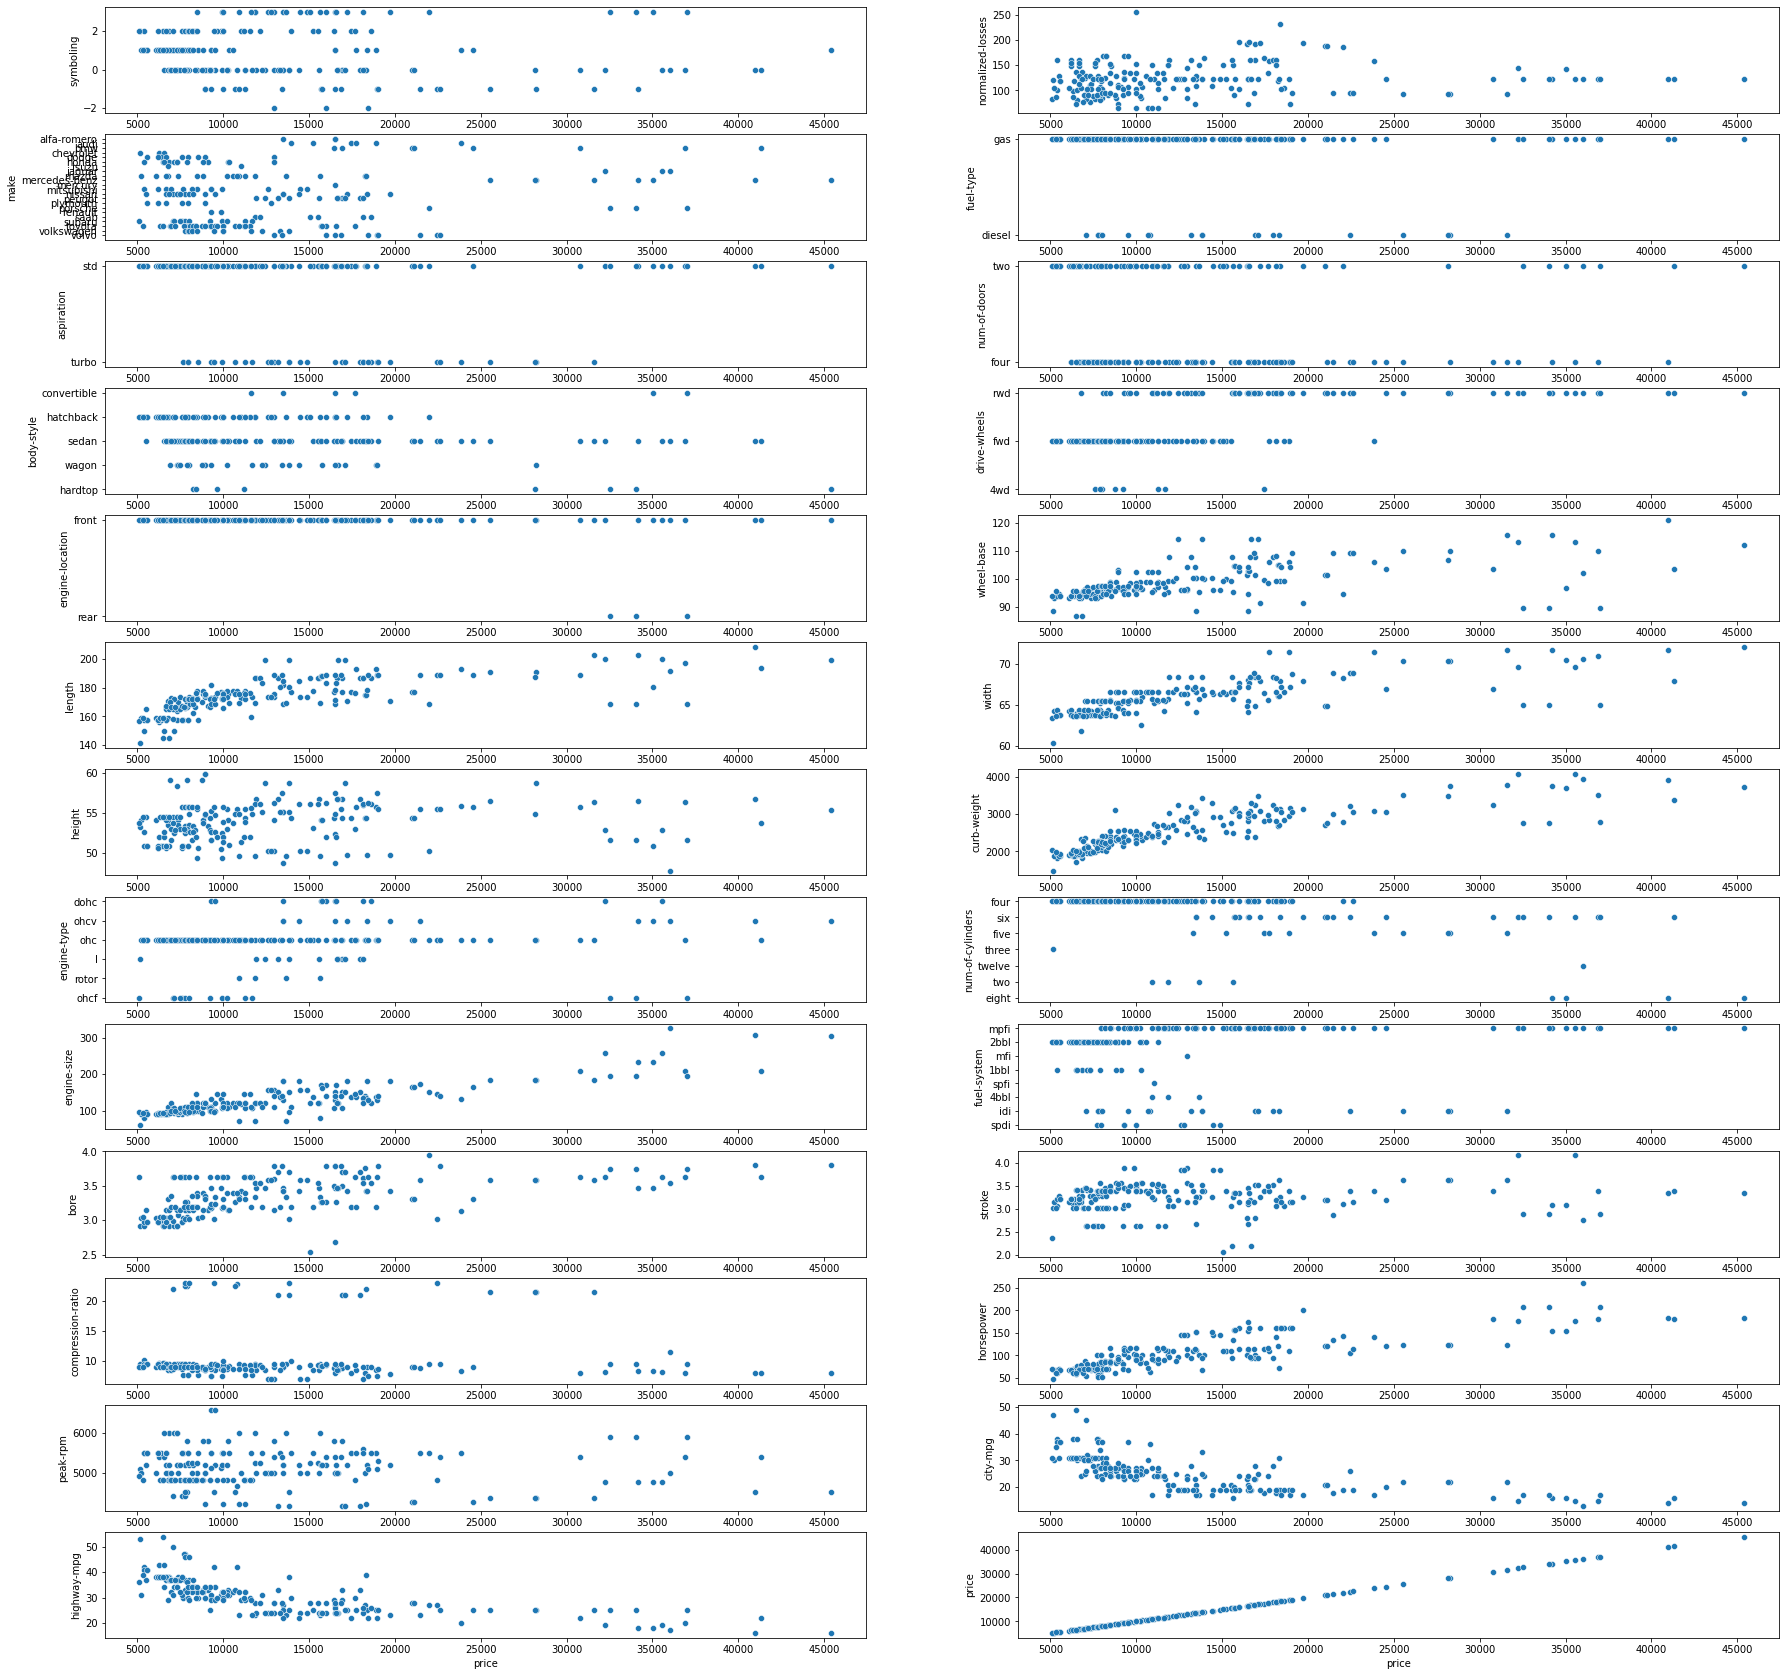

In [ ]:
fig=plt.figure(figsize=(30,30))
for i,col  in enumerate(data.columns):
    fig.add_subplot(13,2,i+1)
    sns.scatterplot(x='price',y=col,data=data)

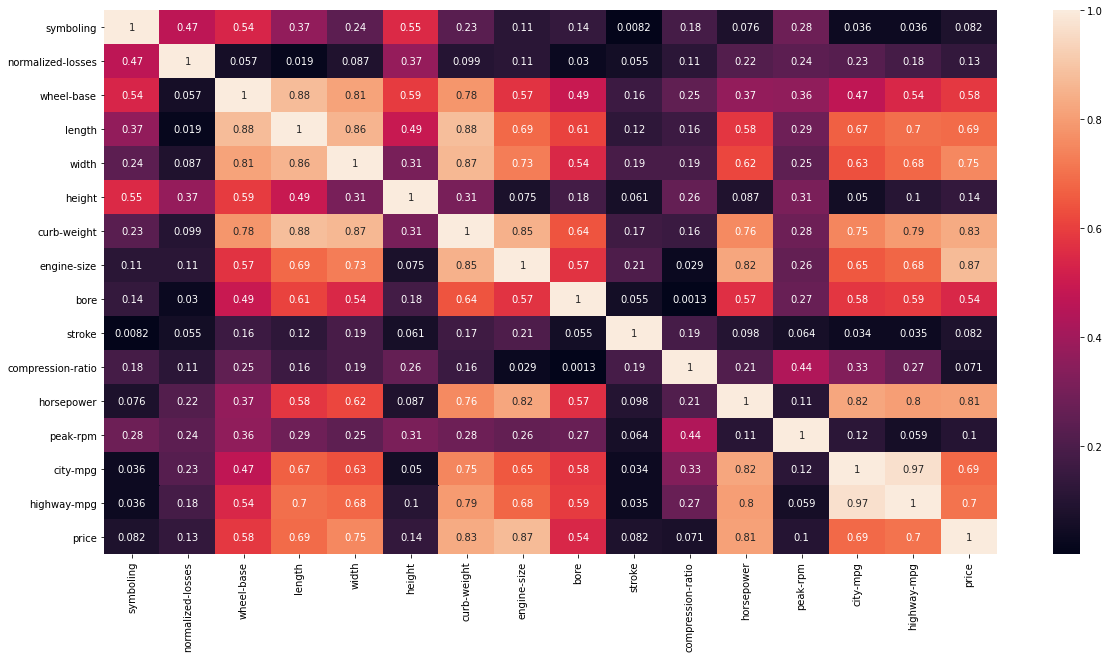

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [ ]:
categorical_columns = ['make','fuel-type','aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
        'engine-location', 'engine-type','num-of-cylinders', 'fuel-system'] 

for column in categorical_columns:
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)


In [ ]:
X = data.drop("price", axis=1)
y = data["price"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


In [ ]:
#Train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
174,1.725050,2.349877,0.678039,0.756540,0.863903,-0.723532,0.814586,1.064691,-0.226966,0.295394,-0.216341,1.545221,0.172637,-0.808323,-0.983583,-0.123091,-0.175412,-0.203595,-0.123091,-0.216506,-0.262962,-0.100251,-0.123091,-0.303959,-0.203595,-0.070711,-0.262962,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,2.298097,-0.251976,-0.240613,-0.332411,0.332411,0.467099,-0.467099,-1.156378,1.156378,-0.175412,-0.203595,1.398529,-0.937286,-0.376889,-0.203595,-1.192345,1.296148,0.123091,-0.123091,3.968627,-0.251976,-1.609126,-0.283981,-0.262962,-0.142494,-0.142494,-0.228814,-1.888963,2.715695,-0.070711,-0.070711,-0.142494,-0.240613,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
5,0.926121,0.000000,0.165748,0.252126,0.196040,-0.273031,-0.094314,0.220165,-0.526138,0.453993,-0.416591,0.176925,0.801670,-0.964397,-0.836484,-0.123091,5.700877,-0.203595,-0.123091,-0.216506,-0.262962,-0.100251,-0.123091,-0.303959,-0.203595,-0.070711,-0.262962,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613,-0.332411,0.332411,0.467099,-0.467099,-1.156378,1.156378,-0.175412,-0.203595,-0.715037,1.066910,-0.376889,-0.203595,0.838683,-0.771517,0.123091,-0.123091,-0.251976,-0.251976,0.621455,-0.283981,-0.262962,-0.142494,-0.142494,4.370355,-1.888963,-0.368230,-0.070711,-0.070711,-0.142494,-0.240613,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
126,-0.671736,0.000000,-0.445695,0.593826,0.291449,0.587017,0.045219,0.123648,0.483569,2.039983,-0.366529,0.022822,0.016154,-0.340101,0.046105,-0.123091,-0.175412,-0.203595,-0.123091,-0.216506,-0.262962,-0.100251,-0.123091,-0.303959,-0.203595,-0.070711,-0.262962,-0.313625,-0.240613,-0.189954,-0.142494,9.974969,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613,-0.332411,0.332411,0.467099,-0.467099,0.864769,-0.864769,-0.175412,-0.203595,-0.715037,-0.937286,2.653300,-0.203595,0.838683,-0.771517,0.123091,-0.123091,-0.251976,-0.251976,0.621455,-0.283981,-0.262962,-0.142494,-0.142494,-0.228814,0.529391,-0.368230,-0.070711,-0.070711,-0.142494,-0.240613,-0.683486,-0.123091,-0.332411,-0.070711,1.088477,-0.216506,-0.070711
117,0.127193,1.002614,-0.842307,-1.375017,-0.996574,-1.296897,-1.140808,-0.889784,-1.348863,-0.085244,-0.191309,-0.949907,0.801670,0.908490,1.075793,-0.123091,-0.175412,-0.203595,-0.123091,-0.216506,-0.262962,-0.100251,-0.123091,-0.303959,-0.203595,-0.070711,-0.262962,-0.313625,-0.240613,5.264436,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613,-0.332411,0.332411,0.467099,-0.467099,0.864769,-0.864769,-0.175412,-0.203595,1.398529,-0.937286,-0.376889,-0.203595,0.838683,-0.771517,0.123091,-0.123091,-0.251976,-0.251976,0.621455,-0.283981,-0.262962,-0.142494,-0.142494,-0.228814,0.529391,-0.368230,-0.070711,-0.070711,-0.142494,-0.240613,1.463087,-0.123091,-0.332411,-0.070711,-0.918715,-0.21650

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

key = ['RandomForestRegressor : ','KNN :']
values = [RandomForestRegressor(),KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2)]

algos = dict(zip(key,values))


In [ ]:
from sklearn.metrics import r2_score

for k,v in algos.items():
  model = v
  model.fit(X_train, y_train)
  model.score(X_test, y_test)
  y_preds = model.predict(X_test)
  score = r2_score(y_test, y_preds)
  print(k,score)




RandomForestRegressor :  0.9244811344357643
KNN : 0.07717873939116682


In [ ]:
scoreList = []
for i in range(1,4):
  for j in range(2,11):
      model = KNeighborsClassifier(n_neighbors = j, metric = 'minkowski', p = i)
      model.fit(X_train, y_train)
      model.score(X_test, y_test)
      y_preds = model.predict(X_test)
      score = r2_score(y_test, y_preds)
      scoreList.append(score)
      print(i,'distance and ',j,' nieghbours : ',score)
print(max(scoreList))

1 distance and  2  nieghbours :  0.5714814963089873
1 distance and  3  nieghbours :  0.3165449437785389
1 distance and  4  nieghbours :  0.26823437750953494
1 distance and  5  nieghbours :  0.12747035666636164
1 distance and  6  nieghbours :  0.1100908324750306
1 distance and  7  nieghbours :  0.08367340957934932
1 distance and  8  nieghbours :  -0.030398340009604397
1 distance and  9  nieghbours :  -0.07496298568464344
1 distance and  10  nieghbours :  -0.07672104697254456
2 distance and  2  nieghbours :  0.5697143574696222
2 distance and  3  nieghbours :  0.19385417799733995
2 distance and  4  nieghbours :  0.1639431971249492
2 distance and  5  nieghbours :  0.07717873939116682
2 distance and  6  nieghbours :  0.02292901514200274
2 distance and  7  nieghbours :  -0.04488243599101227
2 distance and  8  nieghbours :  -0.13085596769598973
2 distance and  9  nieghbours :  -0.11793200771220724
2 distance and  10  nieghbours :  -0.12538212257998738
3 distance and  2  nieghbours :  0.372712